In [ ]:
#F2 : Schwefel's_Problem_F2_Dim50

In [45]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import time

In [46]:
#set desktop or system path
import sys
sys.path.append('C:\\DCHAVAN\\DSTI-Masters\\Curriculum\\2020\\Metaheuristics\\Assignment\\Project\\DataF1F6')

In [47]:
dataf2 = pd.read_csv("f2.csv")
shwf_data = dataf2["f2data"].tolist()
dataf2.head(10)

,f2data
0,-26.887899
1,-4.909030
2,-56.826025
3,-95.043670
4,-4.339776
5,-50.297069
6,-2.752899
7,-84.856153
8,-74.533727
9,-60.380274


In [48]:
# Function parameters
D = 50
bias = -450
lower_bound = -100
upper_bound = 100

In [49]:
# Schwefel_Problem function with the parameters
def function(x, data=shwf_data, dim=D, f_bias=bias):
    F = abs(x[0] - data[0])
    for i in range(1,dim - 1):
        z = x[i] - data[i]
        F = max(F, abs(z))
    fc = F + f_bias
    return fc

In [50]:
#Function to compute the random uniform distribution
def fc_sol(dim, lower_bound, upper_bound):
    xmin = lower_bound * np.ones(dim)
    xmax = upper_bound * np.ones(dim)
    x0 = np.random.uniform(min(xmin), max(xmax), dim)
    return x0

In [51]:
list_sol = []
def all_sol(xk):
    fc_sol = function(xk)
    list_sol.append(fc_sol)
    return fc_sol

In [52]:
# F2-Function to solve the equation
def solver(dimension, lower_bound, upper_bound):
    global f2sol
    # Compute the initial guess
    x0 = fc_sol(dimension, lower_bound, upper_bound)
    # Minimize the function from BFGS algorithm
    f2sol = minimize(all_sol, x0, bounds=(lower_bound, upper_bound), method='BFGS', callback=all_sol)
    return f2sol, list_sol

In [53]:
def plot_fitness(solution):
    fig = plt.figure(figsize=(16, 13))
    plt.plot(solution)

In [54]:
plt.show()

In [55]:
# Solve the problem
solver(D, lower_bound, upper_bound)

(      fun: -423.0723768704241
  hess_inv: array([[ 7.08213099e-09,  7.08210386e-09,  7.08213099e-09, ...,
         -6.28404048e-10, -2.96110454e-09,  0.00000000e+00],
        [ 7.08210386e-09,  2.25299707e+01,  2.12989538e+01, ...,
         -1.99916607e+00, -9.42006839e+00,  0.00000000e+00],
        [ 7.08213099e-09,  2.12989538e+01,  2.12989538e+01, ...,
         -1.88993347e+00, -8.90536449e+00,  0.00000000e+00],
        ...,
        [-6.28404048e-10, -1.99916607e+00, -1.88993347e+00, ...,
          6.70447404e+01,  5.80180989e+01,  0.00000000e+00],
        [-2.96110454e-09, -9.42006839e+00, -8.90536449e+00, ...,
          5.80180989e+01,  7.85905560e+01,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])
       jac: array([-7.62939453e-06,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, 

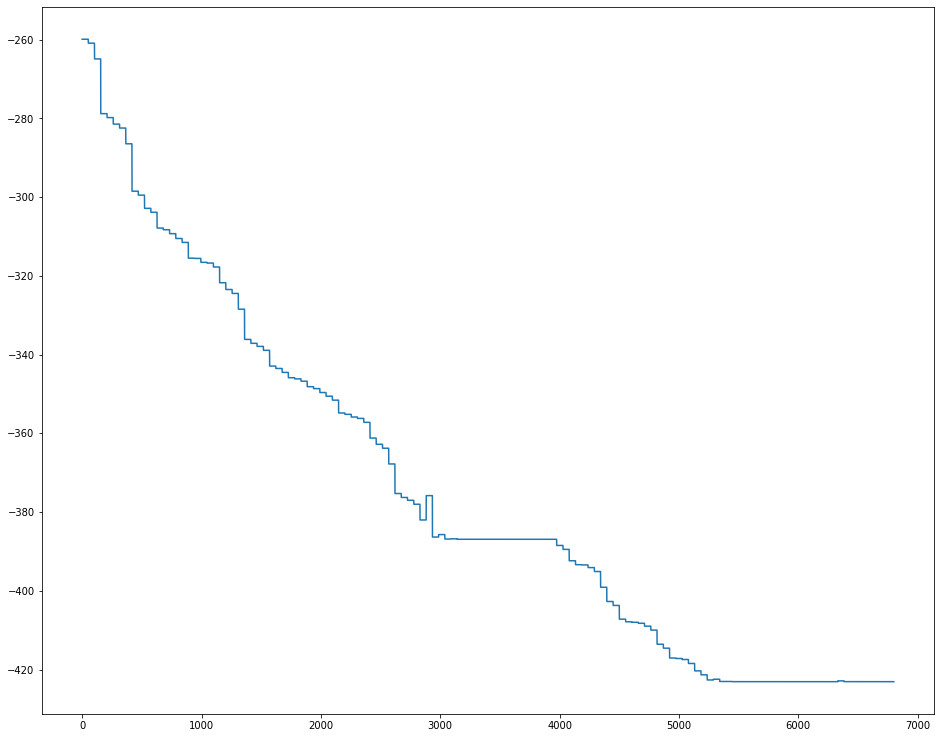

In [56]:
plot_fitness(list_sol)

In [57]:
f2_sol = pd.DataFrame(f2sol.x, columns=[''])
f2_sol.to_csv("f2_schwf50.csv", sep=",")